In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('../csv/keisuke1.csv',header=0)
df2 = pd.read_csv('../csv/keisuke2.csv',header=0)
df3 = pd.read_csv('../csv/keisuke3.csv',header=0)
df4 = pd.read_csv('../csv/keisuke4.csv',header=0)

In [3]:
df1.sample(5)

,SEC,STATE,GSR,Delta,Theta,Low_Alpha,High_Alpha,Low_Beta,High_Beta,Low_Gamma,Mid_Gamma
632,316.0,4,489,592862,333378,4111,3100,62450,19919,8109,113051
822,411.0,4,500,1231298,315717,53225,75392,57620,148175,12997,344604
81,40.5,1,475,13582,31096,16370,10615,29810,58527,3968,250049
324,162.0,2,517,27551,43007,25172,18387,19592,90884,1616,248395
664,332.0,4,490,154256,150536,4934,13618,16545,96228,5224,91676


In [4]:
sec = df1['SEC']
state = [df1['STATE'], df2['STATE'], df3['STATE'], df4['STATE']]
gsr = [df1['GSR'], df2['GSR'], df3['GSR'], df4['GSR']]
d = [df1['Delta'], df2['Delta'], df3['Delta'], df4['Delta']]
t = [df1['Theta'], df2['Theta'], df3['Theta'], df4['Theta']]
la = [df1['Low_Alpha'], df2['Low_Alpha'], df3['Low_Alpha'], df4['Low_Alpha']]
ha = [df1['High_Alpha'], df2['High_Alpha'], df3['High_Alpha'], df4['High_Alpha']]
lb = [df1['Low_Beta'], df2['Low_Beta'], df3['Low_Beta'], df4['Low_Beta']]
hb = [df1['High_Beta'], df2['High_Beta'], df3['High_Beta'], df4['High_Beta']]
lg = [df1['Low_Gamma'], df2['Low_Gamma'], df3['Low_Gamma'], df4['Low_Gamma']]
mg = [df1['Mid_Gamma'], df2['Mid_Gamma'], df3['Mid_Gamma'], df4['Mid_Gamma']]

In [5]:
#This time, we use z-score normalization since outlier appares alot

In [6]:
def mean_std(y):
    result = np.array(y, dtype=float)
    mean = result.mean(axis = 0)
    result -= mean
    std = result.std(axis = 0)
    result /= std 
    return result

In [7]:
for data in [gsr, d, t, la, ha, lb, hb, lg, mg]:
    for i in range(4):
        data[i] = mean_std(data[i])

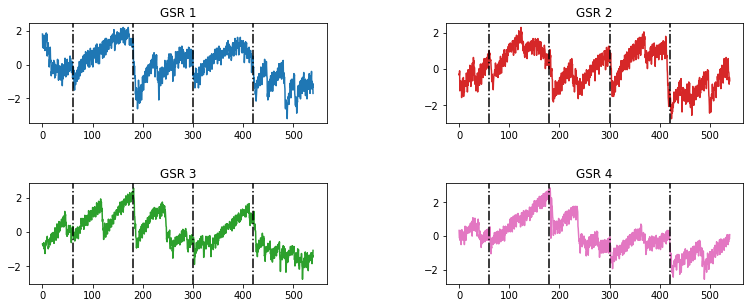

<Figure size 432x288 with 0 Axes>

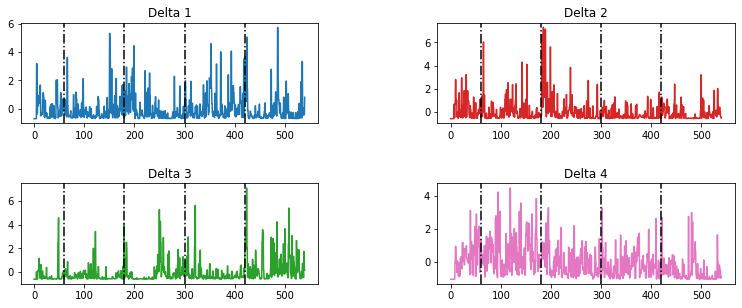

<Figure size 432x288 with 0 Axes>

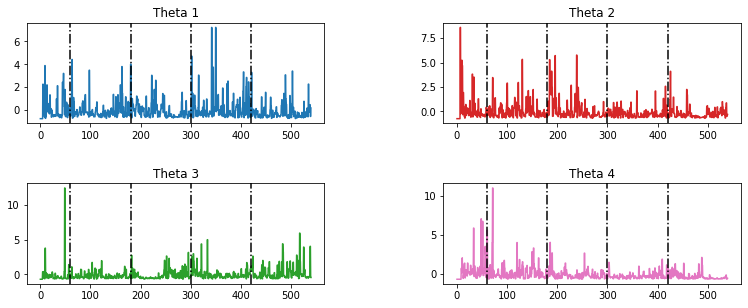

<Figure size 432x288 with 0 Axes>

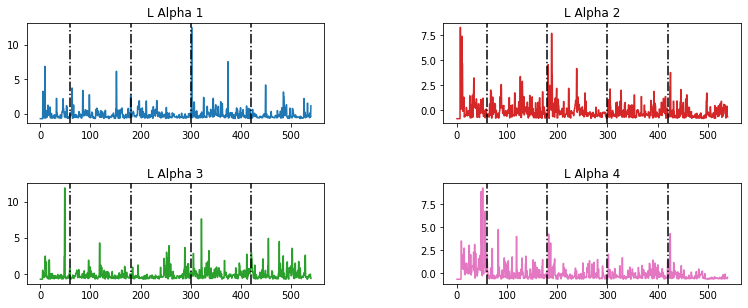

<Figure size 432x288 with 0 Axes>

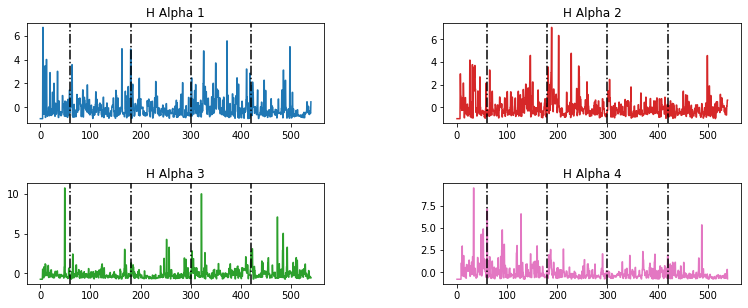

<Figure size 432x288 with 0 Axes>

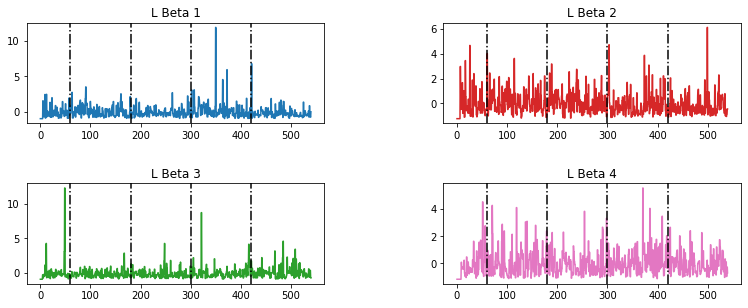

<Figure size 432x288 with 0 Axes>

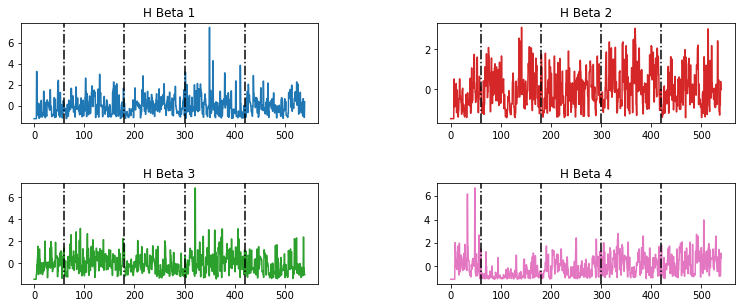

<Figure size 432x288 with 0 Axes>

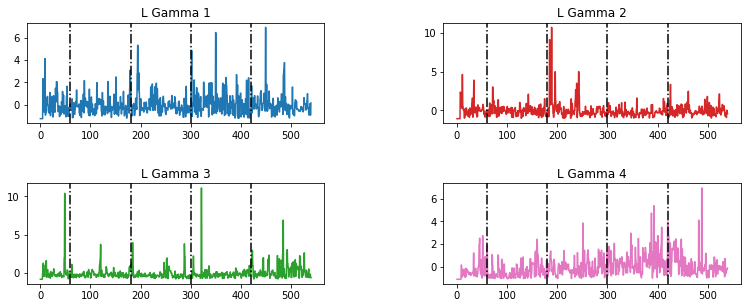

<Figure size 432x288 with 0 Axes>

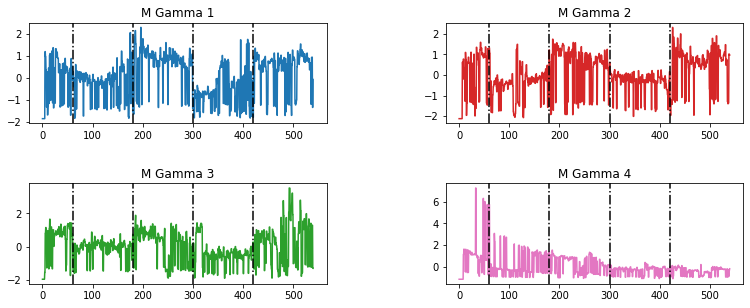

<Figure size 432x288 with 0 Axes>

In [8]:
for data, title, in zip([gsr, d, t, la, ha, lb, hb, lg, mg],['GSR', 'Delta', 'Theta', 'L Alpha', 'H Alpha', 'L Beta', 'H Beta', 'L Gamma', 'M Gamma']):
    fig, axs = plt.subplots(2, 2, figsize=(12.8, 4.8))
    axs[0, 0].plot(sec, data[0])
    axs[0, 0].set_title(title+' 1')
    axs[0, 1].plot(sec, data[1], 'tab:red')
    axs[0, 1].set_title(title+' 2')
    axs[1, 0].plot(sec, data[2], 'tab:green')
    axs[1, 0].set_title(title+' 3')
    axs[1, 1].plot(sec, data[3], 'tab:pink')
    axs[1, 1].set_title(title+' 4')
    fig.subplots_adjust(hspace=0.6, wspace=0.4)
    fig = plt.figure(linewidth=10)
    for c in axs:
        for ax in c:
            ax.axvline(x=60, color='black', linestyle='-.')
            ax.axvline(x=180, color='black', linestyle='-.')
            ax.axvline(x=300, color='black', linestyle='-.')
            ax.axvline(x=420, color='black', linestyle='-.')

In [9]:
def get_box(data, label):
    fig, axs = plt.subplots(2, 2)
    plt.title(label)
    axs[0, 0].boxplot((data[i][:60],data[i][60:180],data[i][180:300],data[i][300:420],data[i][420:540]))
    axs[0, 0].set_title(label+' 1')
    axs[0, 1].boxplot((data[i][:60],data[i][60:180],data[i][180:300],data[i][300:420],data[i][420:540]))
    axs[0, 1].set_title(label+' 2')
    axs[1, 0].boxplot((data[i][:60],data[i][60:180],data[i][180:300],data[i][300:420],data[i][420:540]))
    axs[1, 0].set_title(label+' 3')
    axs[1, 1].boxplot((data[i][:60],data[i][60:180],data[i][180:300],data[i][300:420],data[i][420:540]))
    axs[1, 1].set_title(label+' 4')
    fig.subplots_adjust(hspace=0.6, wspace=0.4)
    for c in axs:
        for ax in c:
            ax.set_xticklabels(['~60', '~180', '~300', '~420', '~540'])

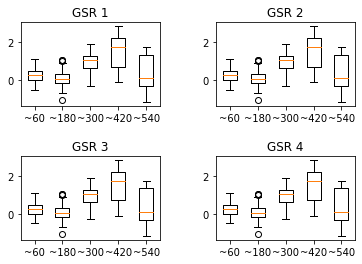

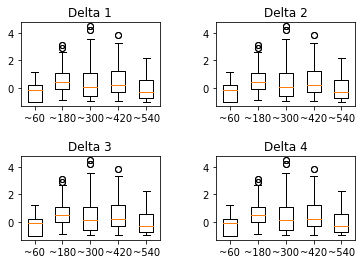

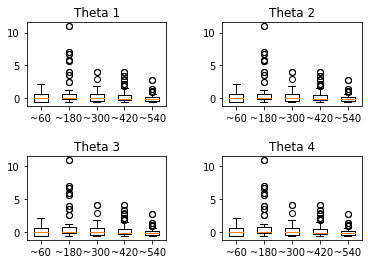

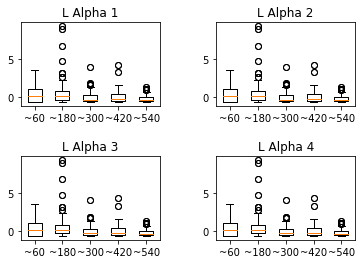

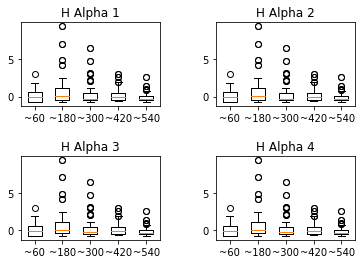

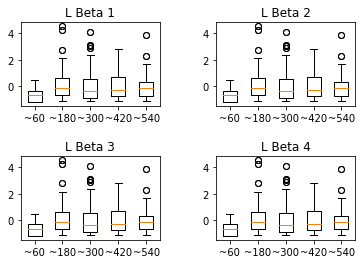

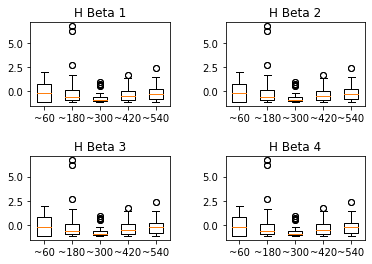

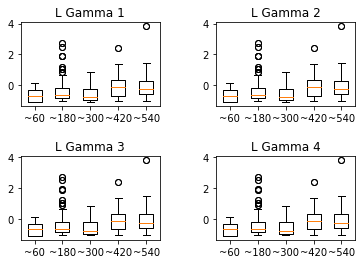

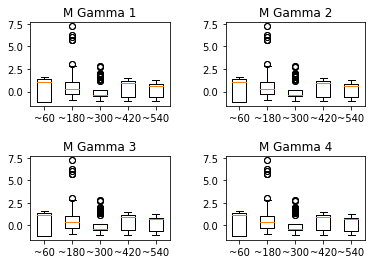

In [10]:
for data, label in zip([gsr, d, t, la, ha, lb, hb, lg, mg], ['GSR', 'Delta', 'Theta', 'L Alpha', 'H Alpha', 'L Beta', 'H Beta', 'L Gamma', 'M Gamma']):
    get_box(data, label)

In [11]:
#As you can see, some sensor values are out of scaled range.(especially, EEG)
#Ill leave these as for now

In [12]:
# Let's create data set for ML model

In [13]:
def create_data(X):
    time_step=30
    x_data = []

    for i in range(0, len(X) - time_step,1):
        tmp = X[i:(i+time_step)].tolist()
        x_data.append(tmp)
        
    return np.array(x_data)

In [14]:
import statistics
def create_label(Y):
    time_step=30
    Ys = []
    for i in range(0, len(Y) - time_step, 1):
        labels = Y[i:(i+time_step)]
        mode = statistics.mode(labels)
        if mode % 2 == 0:
            Ys.append(1)
        if mode % 2 == 1:
            Ys.append(0)
    
    return np.array(Ys).reshape(-1, 1)

In [15]:
# Drop the first 60 sec (STATE 1) because it's calibration part

In [16]:
df = df3
data = df[(df['STATE'] >= 2) & (df['STATE'] <= 3)]

In [17]:
X = data[['GSR', 'Delta', 'Theta', 'Low_Alpha', 'High_Alpha', 'Low_Beta', 'High_Beta', 'Low_Gamma', 'Mid_Gamma']]
X = mean_std(X)
X = create_data(X)

In [18]:
y = data['STATE']
y = create_label(y)

In [19]:
X.shape, y.shape

((450, 30, 9), (450, 1))

In [20]:
data = df[(df['STATE'] >= 4) & (df['STATE'] <= 5)]
X_test = data[['GSR', 'Delta', 'Theta', 'Low_Alpha', 'High_Alpha', 'Low_Beta', 'High_Beta', 'Low_Gamma', 'Mid_Gamma']]
X_test = mean_std(X_test)
X_test = create_data(X_test)

y_test = data['STATE']
y_test = create_label(y_test)

In [21]:
X_test.shape, y_test.shape

((450, 30, 9), (450, 1))

In [22]:
# Let's split data by 50% training data and 50% test data

In [23]:
import tensorflow as tf
from tensorflow.python.compiler.mlcompute import mlcompute
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()
mlcompute.set_mlc_device(device_name='gpu') # Available options are 'cpu', 'gpu', and 'any'.
tf.config.run_functions_eagerly(False)

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, LSTM

In [24]:
def create_model():
    model = Sequential()
    model.add(LSTM(16, input_shape = [30, 9], return_sequences = False))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation = 'sigmoid'))
    return model

In [25]:
model = create_model()
model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['acc'])
history = model.fit(X,
         y,
         epochs = 64,
         batch_size = 64,
         validation_split = 0.1,
         shuffle = False)

Train on 405 samples, validate on 45 samples
Epoch 1/64
405/405 [==============================] - 0s 461us/sample - loss: 0.6792 - acc: 0.5852 - val_loss: 0.6635 - val_acc: 0.6444
Epoch 2/64
405/405 [==============================] - 0s 197us/sample - loss: 0.6541 - acc: 0.6914 - val_loss: 0.6602 - val_acc: 0.7111
Epoch 3/64
405/405 [==============================] - 0s 202us/sample - loss: 0.6313 - acc: 0.7407 - val_loss: 0.6569 - val_acc: 0.7111


/Users/keisuke_konno/tf-beta/.venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Epoch 4/64
405/405 [==============================] - 0s 236us/sample - loss: 0.6095 - acc: 0.8173 - val_loss: 0.6534 - val_acc: 0.7333
Epoch 5/64
405/405 [==============================] - 0s 300us/sample - loss: 0.5845 - acc: 0.8370 - val_loss: 0.6500 - val_acc: 0.7556
Epoch 6/64
405/405 [==============================] - 0s 379us/sample - loss: 0.5643 - acc: 0.8815 - val_loss: 0.6467 - val_acc: 0.7556
Epoch 7/64
405/405 [==============================] - 0s 312us/sample - loss: 0.5419 - acc: 0.8864 - val_loss: 0.6434 - val_acc: 0.7778
Epoch 8/64
405/405 [==============================] - 0s 337us/sample - loss: 0.5186 - acc: 0.9235 - val_loss: 0.6403 - val_acc: 0.8000
Epoch 9/64
405/405 [==============================] - 0s 405us/sample - loss: 0.4945 - acc: 0.9358 - val_loss: 0.6372 - val_acc: 0.8222
Epoch 10/64
405/405 [==============================] - 0s 393us/sample - loss: 0.4680 - acc: 0.9383 - val_loss: 0.6343 - val_acc: 0.8222
Epoch 11/64
405/405 [==========================

Epoch 64/64
405/405 [==============================] - 0s 448us/sample - loss: 0.0197 - acc: 1.0000 - val_loss: 0.5781 - val_acc: 0.8889


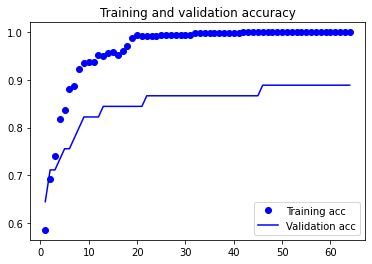

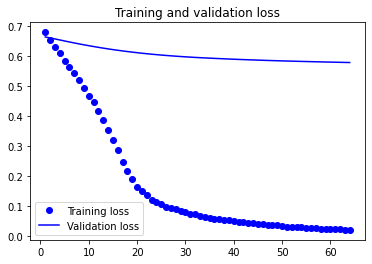

In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(test_loss, test_acc)

0.6194551836119758 0.8244445


In [28]:
result = model.predict(X_test)
for i in range(len(result)):
    if result[i] >= 0.5:
        result[i] = 1
    else:
        result[i] = 0

In [29]:
i = np.arange(0, len(result), 1)

In [30]:
test = y_test.reshape(-1,).tolist()
result = result.reshape(-1,).tolist()

In [31]:
from nltk import ConfusionMatrix
print(ConfusionMatrix(test, result))

  |   0   1 |
--+---------+
0 |<147> 77 |
1 |  97<129>|
--+---------+
(row = reference; col = test)



In [32]:
len(result)

450